In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

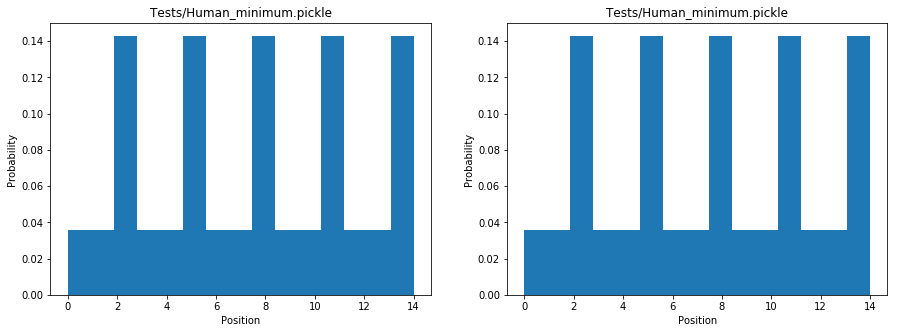

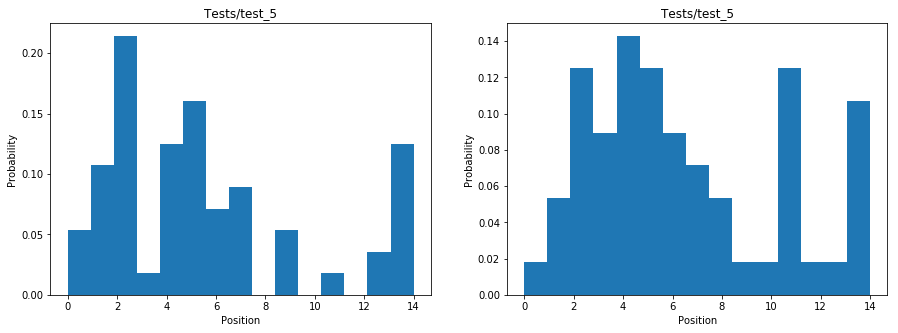

In [21]:
filenames = ["Tests/Human_minimum.pickle","Tests/test_5"]
for file_name in filenames:
    fileObject = open(file_name,'rb')  
    all_selected = pickle.load(fileObject)

    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)

    num = [x[1] for x in all_selected[0]]
    plt.subplot(1, 2, 1)
    plt.hist(num, density=True, bins=15)
    plt.title(file_name)
    plt.xlabel('Position')
    plt.ylabel('Probability')

    num = [x[1] for x in all_selected[1]]
    plt.subplot(1, 2, 2)
    plt.hist(num, density=True, bins=15)
    plt.title(file_name)
    plt.xlabel('Position')
    plt.ylabel('Probability')

    plt.show()

    fileObject.close()

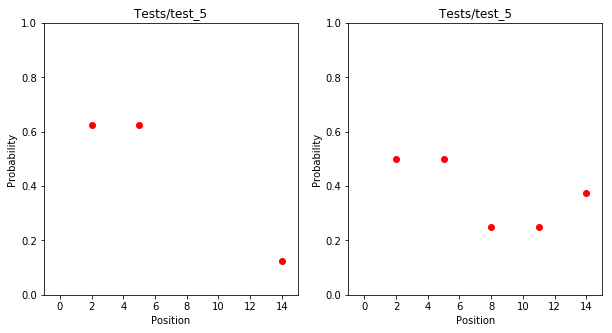

In [46]:
fileObject = open("Tests/Human_minimum.pickle",'rb')  
minima = pickle.load(fileObject)
fileObject.close()

data_correct =[]
    
for i in range (len(all_selected)):
    temp_data_correct = np.zeros(15)
    for j in range (len(all_selected[i])):
        temp_data_correct[minima[i][j][1]] += 1

    data_correct.append(temp_data_correct)

filenames = ["Tests/test_5"]
for file_name in filenames:
    fileObject = open(file_name,'rb')  
    all_selected = pickle.load(fileObject)
    fileObject.close()
    
    correct =[]
    
    for i in range (len(all_selected)):
        temp_correct = np.zeros(15)
        observe_correct = np.zeros(15)
        for j in range (len(all_selected[i])):
            if all_selected[i][j] == minima[i][j]:
                temp_correct[minima[i][j][1]] += 1
        
        for k in range(len(temp_correct)):
            if (k+1)%3 == 0:
                observe_correct[k] = temp_correct[k]
        
        observe_correct =[float('nan') if x==0 else x for x in observe_correct]
        
        correct.append(np.true_divide(observe_correct, data_correct[i]))
    
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(10)

    num = correct[0]
    y_pos = np.arange(len(num))
    plt.subplot(1, 2, 1)
    plt.plot(y_pos, num, 'ro')
    plt.title(file_name)
    plt.ylim([0,1])
    plt.xlim([-1,15])
    plt.xlabel('Position')
    plt.ylabel('Probability')

    num = correct[1]
    y_pos = np.arange(len(num))
    plt.subplot(1, 2, 2)
    plt.plot(y_pos, num, 'ro')
    plt.ylim([0,1])
    plt.xlim([-1,15])
    plt.title(file_name)
    plt.xlabel('Position')
    plt.ylabel('Probability')

